# Overfitting
## In this lab, we are going to explore how thoughtfully choosing a model and using test set are important parts of avoiding overfitting. 

We are going to apply these concepts to a classification model. We want to develop a decision boundary, on one side of which we have class A and on the other we have class B.

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever), and sucks only slightly less than overfitting. At least your model performs consistently bad :)


### First, we are going to generate some synthetic data. To make these concepts visual, we are going to generate this data to be concentric circles. Run the code below to do so. 

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

### As our classification algorithm, we are going to use a type of SVM with a radial basis function. This basically works by mapping each point into a higher dimensional space that can be split by the SVM (gross oversimplificaiton). That looks something like this:
![RBFSVM.png](../images/RBFSVM.png)

### We can change thecomplexity of the decision boundaries applied by the SVM by changignt the size of the radial basis function, through the parameter 'gamma'.

Instantiate a list of three SVM classifiers with three different gamma parameters, (.001, 1, and 20).

* The behavior of the model is very sensitive to the gamma parameter.
* If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself 
* When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

In [95]:
# Your code here
#import the Support Vector Machines (SVM)
from sklearn.svm import SVC


gamma_range = [.001, 1,5, 20]
classifiers = []
for gamma in gamma_range:
    clf = SVC(gamma=gamma)
    clc_fit = clf.fit(X, y)
    classifiers.append(clc_fit)

In [96]:
classifiers 

[SVC(gamma=0.001), SVC(gamma=1), SVC(gamma=5), SVC(gamma=20)]

### Now, we are going to plot the boundaries created by each of these classifiers with the points we generated. Run the following code to make three graphs of each SVM classifier.

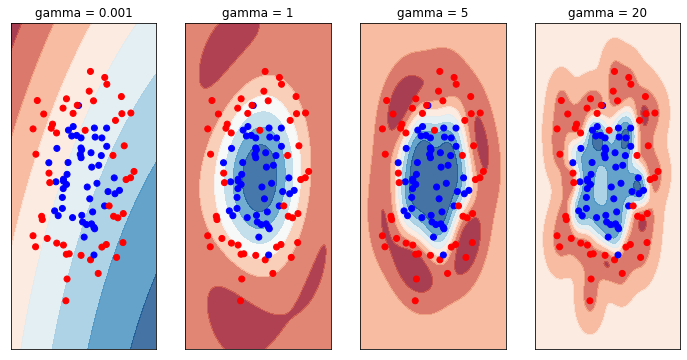

In [97]:
from matplotlib.colors import ListedColormap

figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

names = ['gamma = 0.001', 'gamma = 1', 'gamma = 5','gamma = 20']

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Where the contour is red, we will predict red, and same for blue; white means there is a 50/50 chance of either class
Explain what you see in the plots above.

Which gamma do you think fits the data best? 

What would you select as the opitmal gamma?

Gui: Aditional info

check this for asnwers:
* https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/

* https://campus.datacamp.com/courses/linear-classifiers-in-python/support-vector-machines?ex=4
    
* https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

In [ ]:
# Your response here
#Note: I added an extra gamma and plot, gamma = 5

#In the plots above i see a higher diferentiation of the points with colors red and blue, higher the gamma more red points have 
# are inside the red contour and the blue points inside the blue contour

#gama = 20 fits best the data but is overfiting the optimal would be gamma = 5 but from the between  gamma parameters, (.001, 1, and 20)
#i would choose gamma = 1 as the optimal

### Without having used a training and testing set, lets see what our accuracy score would be for, for example, a gamma of .7. Use the .score() method.

In [27]:
# Your code here
SVC(gamma=0.7).fit(X,y).score(X,y)

0.93

### Wow thats good accuracy! But is it generalizable? Make a test/train split and see how the model performs on the SVM with the gamma of 20. 

In [32]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=42, gamma=20)
# Train the classifier
svm_model = svm.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print('The accuracy score of the model is',accuracy_score(y_test,y_pred))

The accuracy score of the model is 0.85


### Try with some of the other gammas to see how the accuracy score changes after implementing a test/train split. 

In [44]:
# Your code here

gama = [0.5,2,6,12,40, 70,100, 300, 500, 700 ]
accuracy_scores = []

for i in gama:
    # Create a SVC classifier using an RBF kernel
    svm = SVC(kernel='rbf', random_state=42, gamma=i)
    # Train the classifier
    svm_model = svm.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

for x, y in zip(gama, accuracy_scores):
    print('gama:',x,'accuracy score',y)


gama: 0.5 accuracy score 0.8
gama: 2 accuracy score 0.8
gama: 6 accuracy score 0.85
gama: 12 accuracy score 0.8
gama: 40 accuracy score 0.85
gama: 70 accuracy score 0.75
gama: 100 accuracy score 0.75
gama: 300 accuracy score 0.5
gama: 500 accuracy score 0.45
gama: 700 accuracy score 0.45


### Was your previous model overfitting? If so, how would you try to improve this model to prevent this?

In [45]:
# Your response here
#test if there is overfiting is the algorithm is memorizing the training data whet will be a problem because if we introduce
#new data it will not predict well

# the natural thing to do is to perform an evaluation of how well our model behaves with test data

# once the model is trained, i can call the score method, to compare results of test predictions with actual values -> returns the accuracy
print("test data accuracy was ",svm_model.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", svm_model.score(X_train, y_train))

test data accuracy was  0.45
train data accuracy was  1.0


In [ ]:
# by the the comparation between the aacuracy score of the train and test data the model is overfiting the train data is being 
#memorized by the model (train data accuracy of 100%). A way to solve this would be changing the gama.

In [93]:
svm2 = SVC(kernel='rbf', random_state=42, gamma=5)
# Train the classifier
svm_model2 = svm2.fit(X_train, y_train)

print("test data accuracy was ",svm_model2.score(X_test,y_test))

# you should always also see the accuracy of the training
print("train data accuracy was ", svm_model2.score(X_train, y_train))

print((svm_model2.score(X_test,y_test))-(svm_model2.score(X_train, y_train)))

test data accuracy was  0.85
train data accuracy was  0.9375
-0.08750000000000002


In [ ]:
# we can see that changing the gamma reduced the overfiting